# EDA

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import missingno as msno
import matplotlib.pyplot as plt


In [39]:
df = pd.read_csv('AmesHousing.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

#✅ Son but :
À partir de maintenant, si j'affiche un DataFrame (ex. df.head()), montre-moi toutes les colonnes, même s'il y en a 100

In [40]:
# Set option to display all columns
pd.set_option('display.max_columns', None)


In [41]:
# # 1.1  percentage of missing values
missing_ratio = df.isna().mean()
print("Missing ratio per column:")
print(missing_ratio[missing_ratio > 0].sort_values(ascending=False))


Missing ratio per column:
Pool QC           0.995563
Misc Feature      0.963823
Alley             0.932423
Fence             0.804778
Mas Vnr Type      0.605802
Fireplace Qu      0.485324
Lot Frontage      0.167235
Garage Qual       0.054266
Garage Cond       0.054266
Garage Yr Blt     0.054266
Garage Finish     0.054266
Garage Type       0.053584
Bsmt Exposure     0.028328
BsmtFin Type 2    0.027645
Bsmt Cond         0.027304
Bsmt Qual         0.027304
BsmtFin Type 1    0.027304
Mas Vnr Area      0.007850
Bsmt Full Bath    0.000683
Bsmt Half Bath    0.000683
BsmtFin SF 1      0.000341
BsmtFin SF 2      0.000341
Electrical        0.000341
Total Bsmt SF     0.000341
Bsmt Unf SF       0.000341
Garage Area       0.000341
Garage Cars       0.000341
dtype: float64


<Axes: >

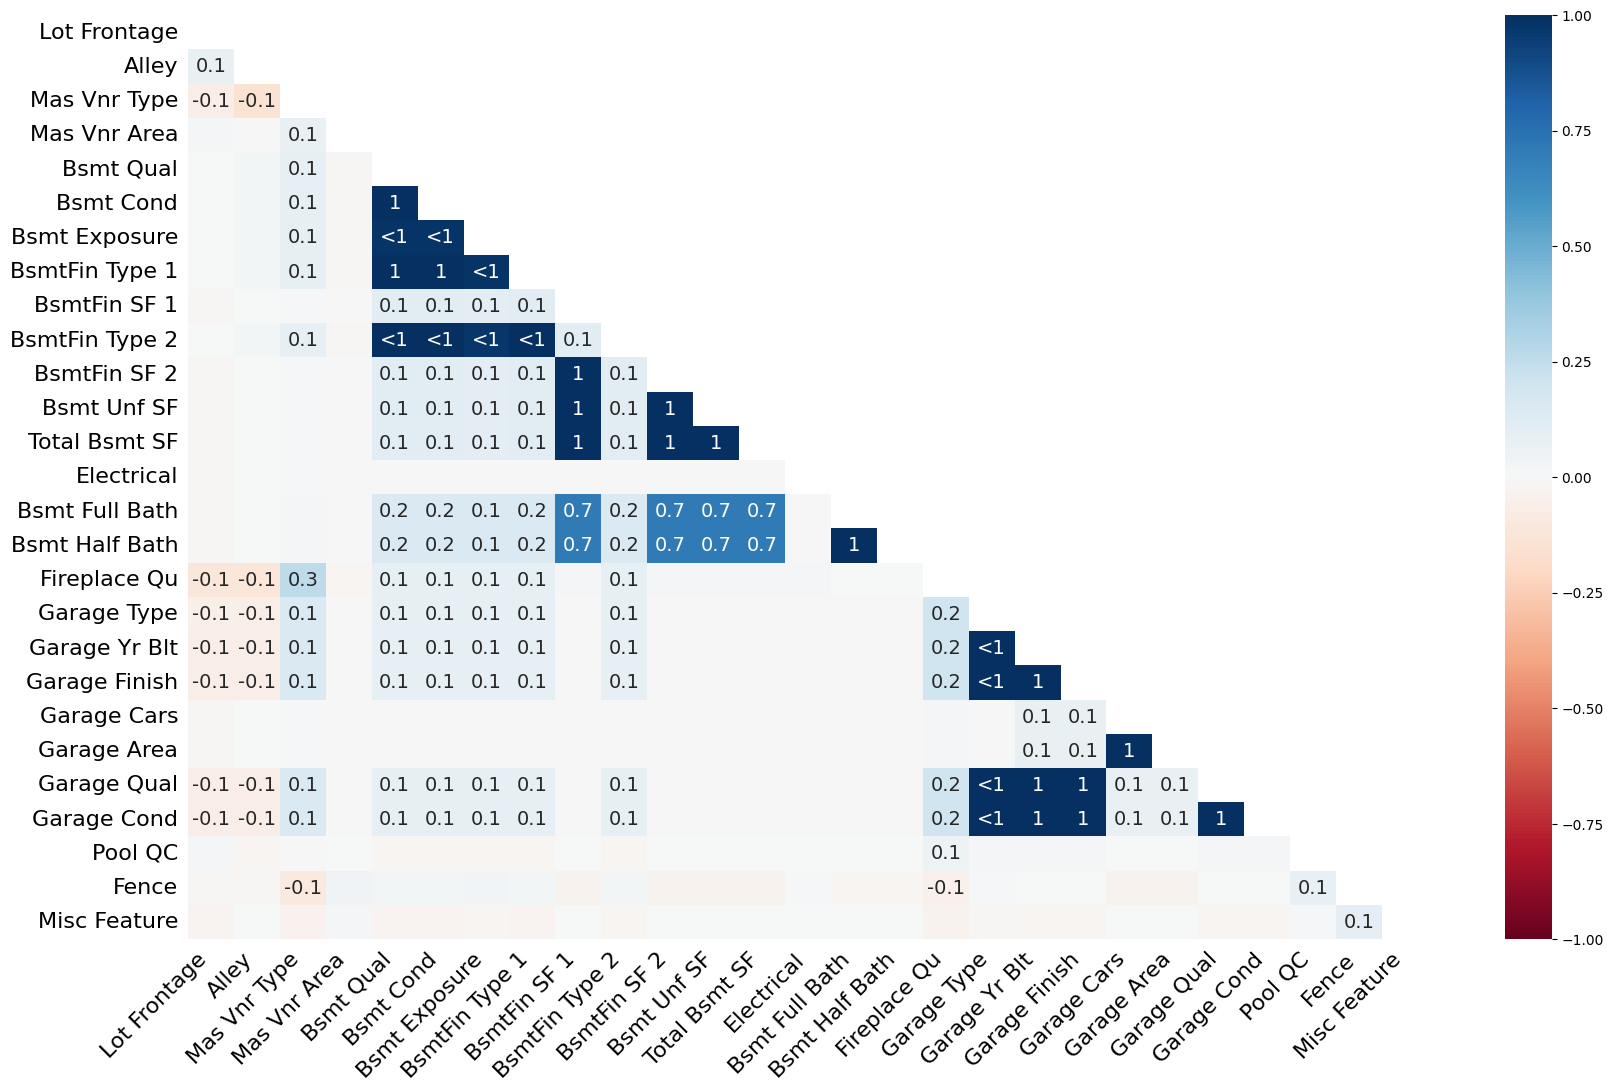

In [42]:
msno.heatmap(df)

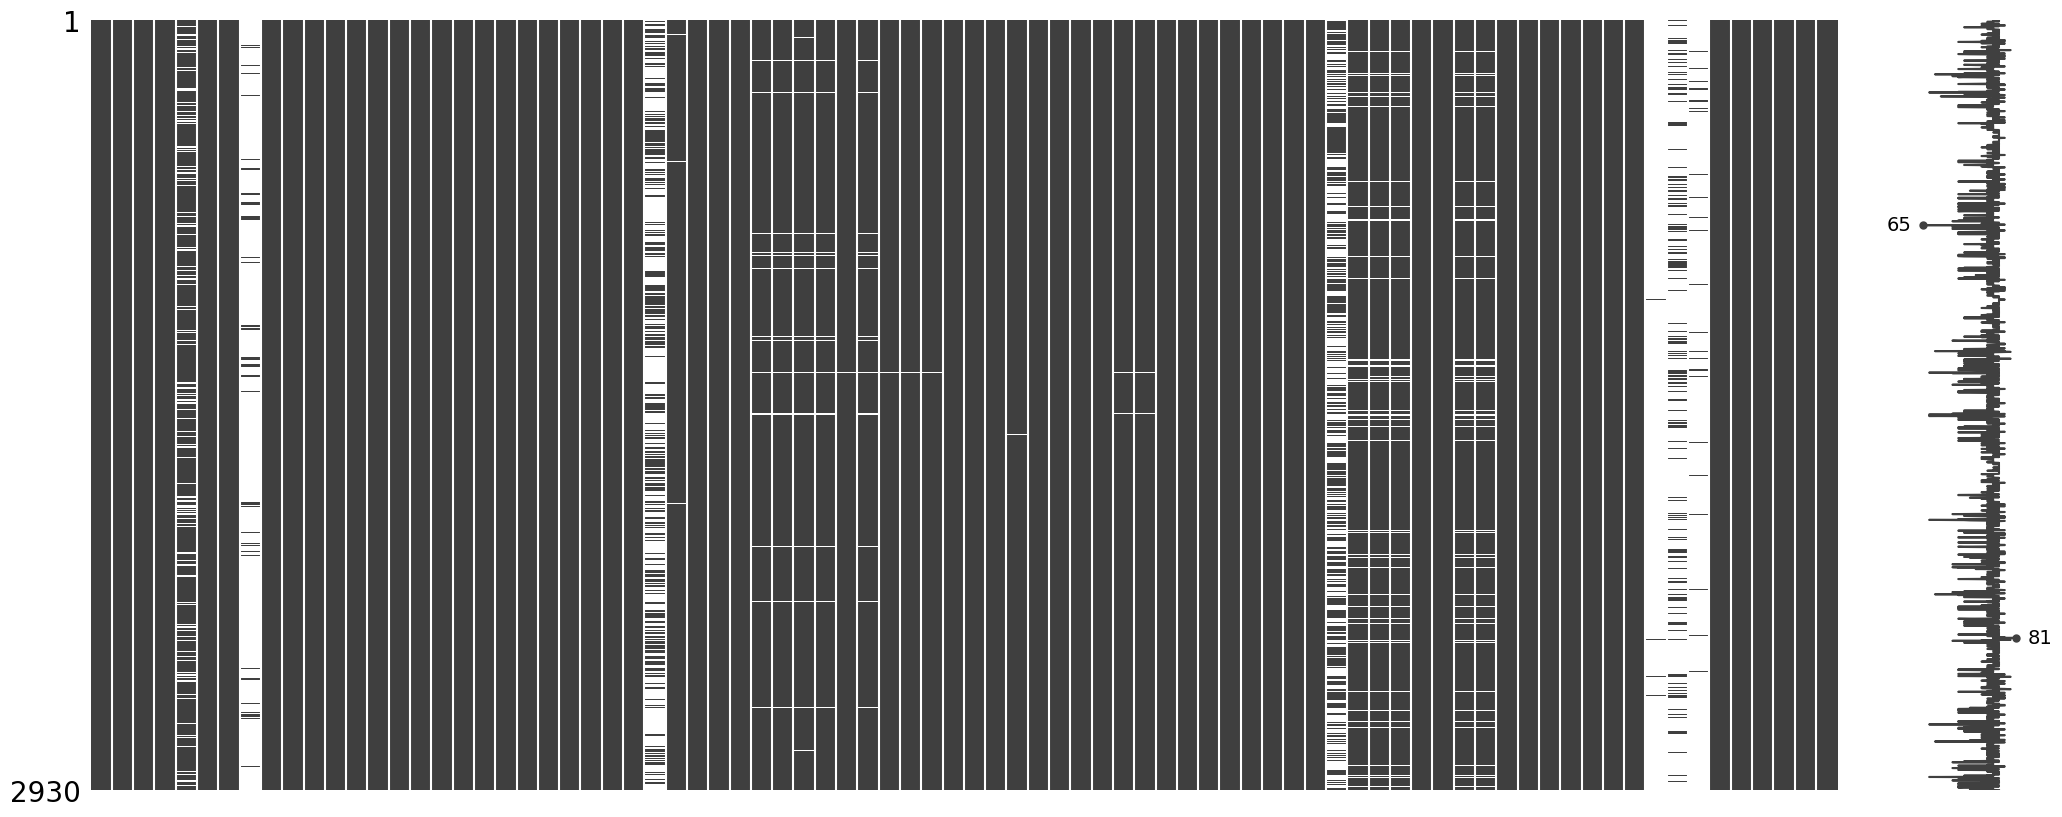

In [43]:
msno.matrix(df)
plt.show()

In [16]:
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

In [44]:
#  1.2  list of columns to drop (except 'Alley')
to_drop = missing_ratio[
    (missing_ratio > 0.40) & (missing_ratio.index != "Alley")
].index

df.drop(columns=to_drop, inplace=True)
print("Dropped:", list(to_drop))

Dropped: ['Mas Vnr Type', 'Fireplace Qu', 'Pool QC', 'Fence', 'Misc Feature']


In [45]:
df['Alley'].unique()

array([nan, 'Pave', 'Grvl'], dtype=object)

## Imputation and scaling

In [46]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

scaler   = StandardScaler()
knn_imp  = KNNImputer(n_neighbors=5)

df[num_cols] = scaler.fit_transform(df[num_cols])      # ①
df[num_cols] = knn_imp.fit_transform(df[num_cols])     # ②
df[num_cols] = scaler.inverse_transform(df[num_cols])  # ③


In [47]:
from sklearn.impute import SimpleImputer

cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(df[cat_cols])

In [48]:
# Step 1: Identify numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# # Step 2: Imputation (on raw values)
# knn_imp = KNNImputer(n_neighbors=5)
# df_imp = df.copy()
# df_imp[num_cols] = knn_imp.fit_transform(df_imp[num_cols])

# Step 3: Standardization (on imputed data)
scaler = StandardScaler()
df_std = df_imp.copy()
df_std[num_cols] = scaler.fit_transform(df_std[num_cols])


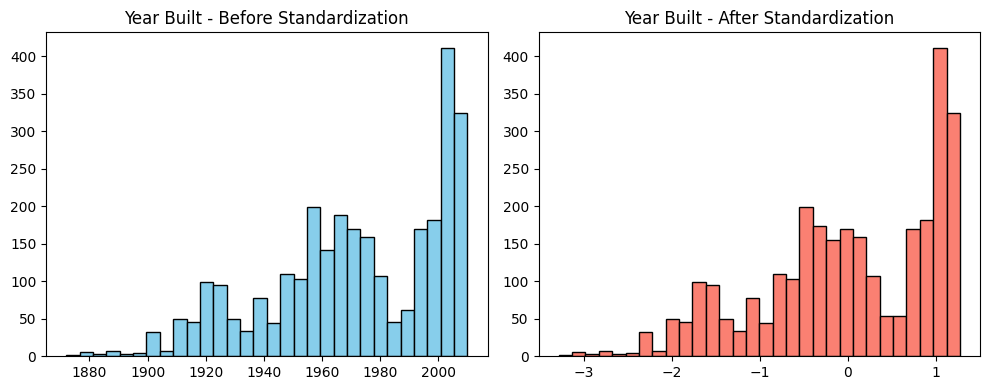

In [49]:
import matplotlib.pyplot as plt

cols_to_plot = ['Year Built']  # replace with any numeric columns

for col in cols_to_plot:
    plt.figure(figsize=(10, 4))

    # Before standardization (after imputation)
    plt.subplot(1, 2, 1)
    plt.hist(df_imp[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col} - Before Standardization")

    # After standardization
    plt.subplot(1, 2, 2)
    plt.hist(df_std[col], bins=30, color='salmon', edgecolor='black')
    plt.title(f"{col} - After Standardization")

    plt.tight_layout()
    plt.show()


In [51]:
# 1.1  percentage of missing values
missing_ratio = df.isna().mean()
print("Missing ratio per column:")
print(missing_ratio[missing_ratio > 0].sort_values(ascending=False))

Missing ratio per column:
Series([], dtype: float64)


In [52]:
# Count duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


### Outliers

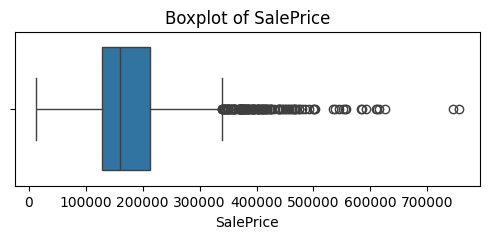

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# For a few key features
col = 'SalePrice'
plt.figure(figsize=(6, 2))
sns.boxplot(data=df, x=col)
plt.title(f'Boxplot of {col}')
plt.show()

In [54]:
# Compute IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]

print(f"Number of outliers in SalePrice: {outliers.shape[0]}")


Number of outliers in SalePrice: 137


In [56]:
import numpy as np

# Apply log1p to avoid log(0)
df['SalePrice_log'] = np.log1p(df['SalePrice'])  # log(1 + x)

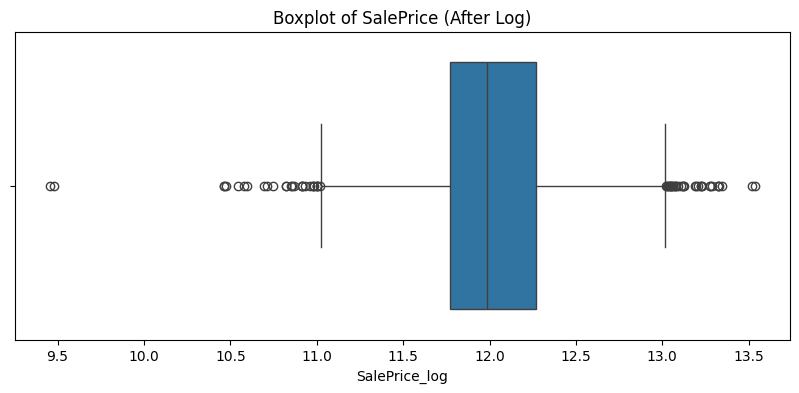

In [57]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SalePrice_log'])
plt.title("Boxplot of SalePrice (After Log)")
plt.show()

In [58]:
# Compute IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]

print(f"Number of outliers in SalePrice: {outliers.shape[0]}")


Number of outliers in SalePrice: 137


## Encoding

In [59]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print(cat_cols)

['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']


In [60]:
df["BsmtFin Type 1"].unique()

array(['BLQ', 'Rec', 'ALQ', 'GLQ', 'Unf', 'LwQ'], dtype=object)

In [61]:
# 1️⃣  Ordinal (LabelEncoder / custom map)
ordinal_columns = [
    'Exter Qual', 'Exter Cond',
    'Bsmt Qual',  'Bsmt Cond',
    'Bsmt Exposure',
    'Heating QC',
    'Kitchen Qual',
    'Garage Qual',  'Garage Cond'
    ]

# 2️⃣  Nominal – low cardinality (One-Hot)
onehot_cols = [
    'MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
    'Utilities', 'Lot Config', 'Land Slope',
    'Condition 1', 'Bldg Type', 'House Style',
    'Roof Style', 'Roof Matl',
    'Foundation', 'Central Air', 'Electrical',
    'Functional', 'Garage Type', 'Garage Finish', 'Paved Drive',
    'BsmtFin Type 1',
    'BsmtFin Type 2',
    'Sale Type', 'Sale Condition',
    'Heating'
]

# 3️⃣  Nominal – high cardinality (Frequency)
freq_cols = [
    'Neighborhood', 'Exterior 1st', 'Exterior 2nd', 'Condition 2'
]


In [64]:
from category_encoders import OneHotEncoder, CountEncoder
from sklearn.preprocessing import LabelEncoder

# 1. Label Encode ordinal columns
for col in ordinal_columns:
    df[col] = LabelEncoder().fit_transform(df[col].astype(str))

# 2. One-Hot Encode nominal columns with low cardinality
onehot = OneHotEncoder(cols=onehot_cols, use_cat_names=True)
df = onehot.fit_transform(df)

# 3. Frequency Encode nominal columns with high cardinality
freq = CountEncoder(cols=freq_cols, normalize=True)
df = freq.fit_transform(df)

In [65]:
non_numeric_cols = df.select_dtypes(include='object').columns
print("Remaining non-numeric columns:", list(non_numeric_cols))

Remaining non-numeric columns: []


In [66]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


In [67]:
print("Final number of features:", df.shape[1])


Final number of features: 186


## Feature Engineering

#Filter Method – SelectKBest avec test F (f_regression)

In [69]:
#  Import des bibliothèques nécessaires
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from math import sqrt
#  Variable cible
target_col = 'SalePrice_log'  # ou 'SalePrice' si tu n'as pas transformé

#  Séparation des features et de la cible
X = df.drop(columns=[target_col])
y = df[target_col]

#  Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Sélection des 20 meilleures variables selon la corrélation linéaire (test F)
selector = SelectKBest(score_func=f_regression, k=20)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

#  Entraînement du modèle de régression
model = LinearRegression()
model.fit(X_train_selected, y_train)

#  Prédictions et évaluation
y_pred = model.predict(X_test_selected)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
#  Affichage des résultats
selected_features = X.columns[selector.get_support()]
print(" Méthode : Filter (SelectKBest + f_regression)")
print(f"Nombre de variables sélectionnées : {len(selected_features)}")
print("Variables sélectionnées :")
print(list(selected_features))
print(f"R² score : {r2:.4f}")
print(f"RMSE : {rmse:.2f}")


✅ Méthode : Filter (SelectKBest + f_regression)
Nombre de variables sélectionnées : 20
Variables sélectionnées :
['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Exter Qual', 'Foundation_PConc', 'Bsmt Qual', 'Total Bsmt SF', 'Heating QC', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Finish_Unf', 'Garage Cars', 'Garage Area', 'SalePrice']
R² score : 0.9538
RMSE : 0.09


🧠 Principe :

Sélectionne les meilleures variables individuellement, selon leur corrélation linéaire avec la cible (test F).
✅ Avantages :

    Simple et rapide

    Indépendant du modèle

⚠️ Inconvénients :

    Évalue chaque variable séparément

    Ne capture pas les interactions entre variables

    Ne tient pas compte de la performance du modèle

#Méthode Wrapper — RFE (Recursive Feature Elimination

In [70]:
# 📦 Imports nécessaires
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# 🎯 Cible
target_col = 'SalePrice_log'  # ou 'SalePrice' si non transformée

# 🧱 Séparation des variables
X = df.drop(columns=[target_col])
y = df[target_col]

# 🧪 Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔁 RFE avec régression linéaire
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=20)
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# 🧠 Entraînement et évaluation
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# 🔎 Noms des variables sélectionnées
selected_features = X.columns[rfe.support_]

# 📊 Résumé
print("✅ Méthode : Wrapper (RFE)")
print(f"Nombre de variables sélectionnées : {len(selected_features)}")
print("Variables sélectionnées :", list(selected_features))
print(f"R² score : {r2:.4f}")
print(f"RMSE : {rmse:.2f}")


✅ Méthode : Wrapper (RFE)
Nombre de variables sélectionnées : 20
Variables sélectionnées : ['MS Zoning_RM', 'MS Zoning_C (all)', 'MS Zoning_I (all)', 'Utilities_NoSewr', 'Neighborhood', 'Bldg Type_Twnhs', 'Overall Qual', 'Roof Matl_WdShngl', 'Roof Matl_ClyTile', 'Exterior 1st', 'Exterior 2nd', 'Heating_GasW', 'Heating_Grav', 'Central Air_N', 'Functional_Typ', 'Functional_Mod', 'Functional_Min1', 'Functional_Min2', 'Functional_Maj1', 'Functional_Sal']
R² score : 0.7603
RMSE : 0.21


### 🧪 Méthode 2️⃣ : Wrapper Method – RFE (Recursive Feature Elimination)

#### 🧠 Principe :
RFE sélectionne les meilleures variables **en entraînant plusieurs fois un modèle**. À chaque itération, il élimine la **moins importante** selon le modèle.

#### ✅ Avantages :
- Tient compte des **interactions entre variables**
- S’appuie sur la **performance réelle du modèle**

#### ⚠️ Inconvénients :
- Lente (entraîne plusieurs modèles)
- Sensible au **bruit et aux corrélations fortes**

#### 💡 Conclusion :
Plus précise que la méthode Filter, RFE est utile lorsqu’on veut une sélection **guidée par le modèle** utilisé.


#Embedded Method – Lasso (L1 Regularization)

In [71]:
# 📦 Imports
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# 🎯 Cible
target_col = 'SalePrice_log'  # ou 'SalePrice' selon ton cas

# 🔢 Séparation variables/features
X = df.drop(columns=[target_col])
y = df[target_col]

# 🧪 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Entraînement Lasso avec validation croisée pour choisir alpha
model = LassoCV(cv=5, random_state=0)
model.fit(X_train, y_train)

# ⚖️ Variables sélectionnées (non nulles)
selected_features = X.columns[model.coef_ != 0]

# 🔍 Transformation
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# 🚀 Réentraînement + Évaluation
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

# 📊 Résumé
print("✅ Méthode : Embedded (Lasso)")
print(f"Alpha choisi par validation croisée : {model.alpha_:.4f}")
print(f"Variables sélectionnées : {list(selected_features)}")
print(f"R² : {r2:.4f}")
print(f"RMSE : {rmse:.2f}")


✅ Méthode : Embedded (Lasso)
Alpha choisi par validation croisée : 18778.4784
Variables sélectionnées : ['PID', 'SalePrice']
R² : 0.5490
RMSE : 0.29
